In [333]:
#Importations of libraries needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score

In [334]:
#Import dataset as dataframe:
df = pd.read_csv('pulsar_star_20456522.csv')
print("The data contains {0} rows and {1} columns".format(df.shape[0], df.shape[1]))
df.head()

The data contains 10000 rows and 9 columns


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,145.320312,55.871635,-0.428449,-0.641909,59.234950,35.485630,-0.649044,0.796462,0.0
1,142.921875,49.608563,-0.084797,-0.228604,2.824415,16.888705,7.816136,74.543327,0.0
2,106.210938,43.062754,0.299330,0.760056,2.925585,15.879468,7.329342,73.450475,0.0
3,117.234375,57.690240,0.176005,-0.646467,1.987458,13.035545,10.351395,145.965463,0.0
4,97.203125,45.225712,0.381121,0.792296,2.070234,16.907383,9.367738,97.525776,0.0


In [335]:
df = df.rename(columns=lambda x: x.strip())
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM-SNR_curve',
       'Standard_deviation_of_the_DM-SNR_curve',
       'Excess_kurtosis_of_the_DM-SNR_curve', 'Skewness_of_the_DM-SNR_curve',
       'target_class'],
      dtype='object')

# Task 1:

##### First we need to identify potential data quality issues, and then propose solutions for each: Potential data quality issues:
##### `Duplicates`, `Datatypes`, `Missing Data` and `Outliers`

#### 1. Duplicates:

In [336]:
df[df.duplicated()].shape[0]

0

##### There are no duplicates in the dataset, so we do not have to worry about removing them

#### 2. Datatypes:

In [337]:
df.dtypes

Mean_of_the_integrated_profile                  float64
Standard_deviation_of_the_integrated_profile    float64
Excess_kurtosis_of_the_integrated_profile       float64
Skewness_of_the_integrated_profile              float64
Mean_of_the_DM-SNR_curve                        float64
Standard_deviation_of_the_DM-SNR_curve          float64
Excess_kurtosis_of_the_DM-SNR_curve             float64
Skewness_of_the_DM-SNR_curve                    float64
target_class                                    float64
dtype: object

#### We can see that all of the categories datatype is fine, except for target_class which would be more ideal as a category, because keeping it as a float may effect out analysis later

In [338]:
df['target_class'] = df['target_class'].astype('category')
df.dtypes

Mean_of_the_integrated_profile                   float64
Standard_deviation_of_the_integrated_profile     float64
Excess_kurtosis_of_the_integrated_profile        float64
Skewness_of_the_integrated_profile               float64
Mean_of_the_DM-SNR_curve                         float64
Standard_deviation_of_the_DM-SNR_curve           float64
Excess_kurtosis_of_the_DM-SNR_curve              float64
Skewness_of_the_DM-SNR_curve                     float64
target_class                                    category
dtype: object

#### 3. Missing data:

In [339]:
print("The number of missing values in the whole dataset is {0}".format(df.isnull().sum().sum()))
100 * (df.isnull().sum()/df.shape[0])

The number of missing values in the whole dataset is 2838


Mean_of_the_integrated_profile                   0.00
Standard_deviation_of_the_integrated_profile     0.00
Excess_kurtosis_of_the_integrated_profile       13.91
Skewness_of_the_integrated_profile               0.00
Mean_of_the_DM-SNR_curve                         0.00
Standard_deviation_of_the_DM-SNR_curve           9.38
Excess_kurtosis_of_the_DM-SNR_curve              0.00
Skewness_of_the_DM-SNR_curve                     5.09
target_class                                     0.00
dtype: float64

##### Lets check the target class values = 1 for the entries with missing values:

In [340]:
null_rows = df[df['Skewness_of_the_DM-SNR_curve'].isnull()]
target_values = null_rows['target_class']
count = 0
for val in target_values:
    if(val == 1):
        count += 1
print(f"Skewness_of_the_DM-SNR_curve: {100 * count/target_values.size}")

null_rows = df[df['Standard_deviation_of_the_DM-SNR_curve'].isnull()]
target_values = null_rows['target_class']
count = 0
for val in target_values:
    if(val == 1):
        count += 1
print(f"Standard_deviation_of_the_DM-SNR_curve: {100 * count/target_values.size}")

null_rows = df[df['Excess_kurtosis_of_the_integrated_profile'].isnull()]
target_values = null_rows['target_class']
count = 0
for val in target_values:
    if(val == 1):
        count += 1
print(f"Excess_kurtosis_of_the_integrated_profile: {100 * count/target_values.size}")

Skewness_of_the_DM-SNR_curve: 10.609037328094303
Standard_deviation_of_the_DM-SNR_curve: 9.275053304904052
Excess_kurtosis_of_the_integrated_profile: 8.986340762041696


#### Lets check the overlap of rows with missing data:

In [341]:
# Select the three specific columns
selected_columns = [
    'Excess_kurtosis_of_the_integrated_profile',
    'Standard_deviation_of_the_DM-SNR_curve',
    'Skewness_of_the_DM-SNR_curve'
]

# Check the overlap of rows with null values between the selected columns
overlap_null_values = df[selected_columns].isnull().all(axis=1)

# Check for rows with at least two selected columns having null values
null_count = df[selected_columns].isnull().sum(axis=1)
rows_with_at_least_two_null = df[null_count >= 2]

# Print or work with the rows containing at least two null values in the selected columns
print(rows_with_at_least_two_null)

#There are 224 lines that are missing 2 or more feauturs, which is at least 25% of relevant data. We are safe to drop these rows:
# df = df.drop(rows_with_at_least_two_null.index)
print("The number of missing values in the whole dataset is {0}".format(df.isnull().sum().sum()))

      Mean_of_the_integrated_profile  \
79                        109.617188   
88                        129.601562   
113                       112.367188   
125                       108.750000   
140                       115.656250   
...                              ...   
9845                      104.554688   
9879                      138.937500   
9882                       96.406250   
9959                      112.976562   
9990                      138.117188   

      Standard_deviation_of_the_integrated_profile  \
79                                       45.063344   
88                                       46.673959   
113                                      53.083494   
125                                      38.090148   
140                                      43.259832   
...                                            ...   
9845                                     43.600066   
9879                                     44.450596   
9882                             

In [342]:
#Make a copy
df_copy = df.copy()

#Skewness_of_the_DM-SNR_curve only is missing 5% of its vales, so we can drop these rows without having a major impact on our dataset
df = df.dropna(subset=['Skewness_of_the_DM-SNR_curve'])
df.shape

(9491, 9)

#### We can see about 5% of our data has been dropped now.

#### We can see that less than 11% of these missing entries are of target type 1S een as the amount of rows with missing values in the dataset is quite significant compared to the total amount of rows in the dataset, the safest way to deal with these missing values is imputation rather than dropping the rows entirely becsuse that would result in a loss of 25% of our data

#### Now we can split out dataset up temporarily into 2 subsets for Integrated Profile and DMSNR Curve while we predict the remaining missing values

In [343]:
#Create two new DataFrames
ip_df = df[['Mean_of_the_integrated_profile', 'Standard_deviation_of_the_integrated_profile', 'Skewness_of_the_integrated_profile']]
ip_df_ekip = df[['Excess_kurtosis_of_the_integrated_profile']]

dmsnr_df = df[['Mean_of_the_DM-SNR_curve', 'Standard_deviation_of_the_DM-SNR_curve', 'Skewness_of_the_DM-SNR_curve']]
dmsnr_df_std = df[['Standard_deviation_of_the_DM-SNR_curve']]

In [344]:
#Now we can impute the data
from sklearn.impute import KNNImputer
knnimputer = KNNImputer(n_neighbors=5)
ip_df_ekip_imputed = knnimputer.fit_transform(ip_df, ip_df_ekip)
dmsnr_df_std_imputed = knnimputer.fit_transform(dmsnr_df, dmsnr_df_std)
df['Excess_kurtosis_of_the_integrated_profile'] = ip_df_ekip_imputed
df['Standard_deviation_of_the_DM-SNR_curve'] = dmsnr_df_std_imputed
df.isnull().sum()
#We now have no null values

Mean_of_the_integrated_profile                  0
Standard_deviation_of_the_integrated_profile    0
Excess_kurtosis_of_the_integrated_profile       0
Skewness_of_the_integrated_profile              0
Mean_of_the_DM-SNR_curve                        0
Standard_deviation_of_the_DM-SNR_curve          0
Excess_kurtosis_of_the_DM-SNR_curve             0
Skewness_of_the_DM-SNR_curve                    0
target_class                                    0
dtype: int64

#### We can test the accuracy of the imputations of mean, median, knn and regression against each other to select which one to move  forward with

In [345]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

#Split data into training and testing data
X = df.drop('target_class', axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
totalaccuracy = 0

#Classifier 1: KNN
#Fit the classifier with the test data
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print(f'Accuracy on the test data with KNN classifier: {accuracy*100:.4f}')
totalaccuracy += accuracy

#Classifier 2: Decision Trees
# Create a Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
# Train the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = decision_tree_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print(f'Accuracy on the test data with Decision Tree Classifier: {accuracy*100:.4f}')
totalaccuracy += accuracy

#Classifier 3: Support Vector Machine
svm_classifier = SVC(C=1.0, kernel='linear')
svm_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print(f'Accuracy on the test data with SVM Classifier: {accuracy*100:.4f}')
totalaccuracy += accuracy

totalaccuracy /= 3
print(f"Average accuracy: {totalaccuracy * 100}")

Accuracy on the test data with KNN classifier: 97.9463
Accuracy on the test data with Decision Tree Classifier: 97.3144


Accuracy on the test data with SVM Classifier: 97.8410
Average accuracy: 97.70054414604176


#### 4. Outliers:

In [346]:
df.describe()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve
count,9491.000000,9491.000000,9491.000000,9491.000000,9491.000000,9491.000000,9491.000000,9491.000000
mean,111.003598,46.493114,111.003598,1.815582,12.649200,12.649200,8.296052,104.570982
std,25.697949,6.833130,25.697949,6.308748,29.577188,29.577188,4.488180,104.968076
min,6.187500,24.772042,6.187500,-1.791886,0.213211,0.213211,-3.139270,-1.976976
25%,100.894531,42.319945,100.894531,-0.187085,1.915552,1.915552,5.778604,34.852933
50%,115.296875,46.877310,115.296875,0.208058,2.801003,2.801003,8.437438,83.069242
75%,127.144531,51.005052,127.144531,0.939842,5.456940,5.456940,10.698874,139.601797
max,189.734375,91.808628,189.734375,68.101622,222.421405,222.421405,34.539844,1191.000837


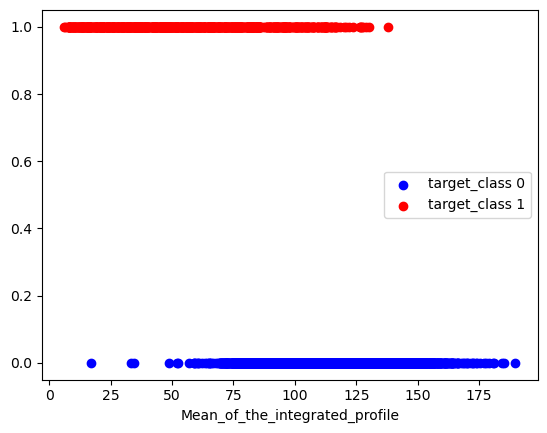

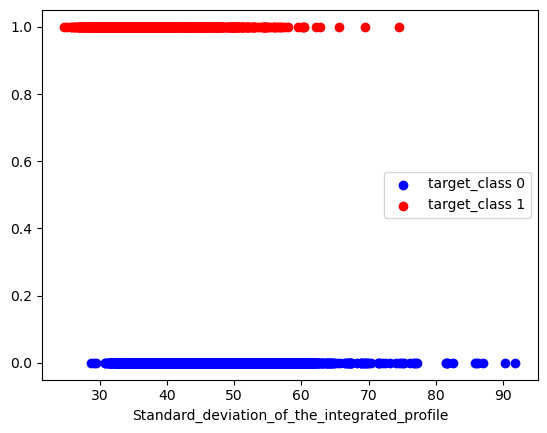

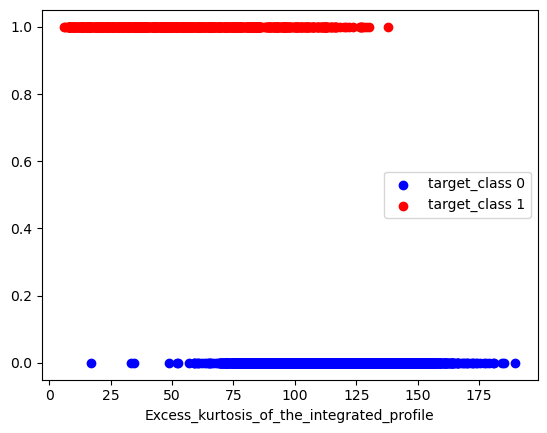

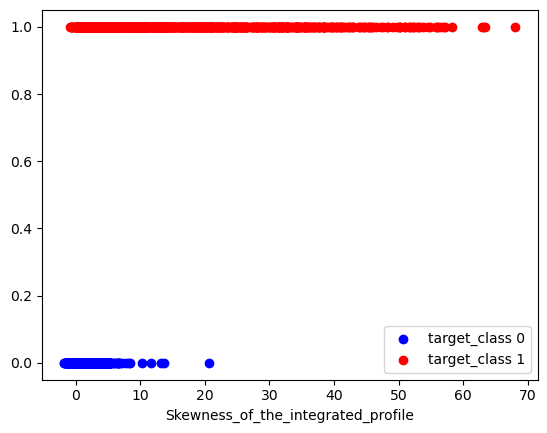

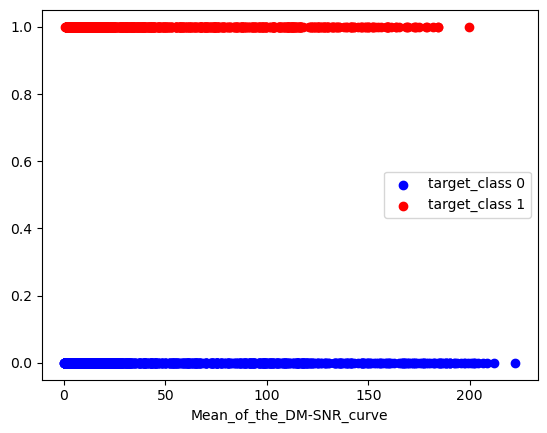

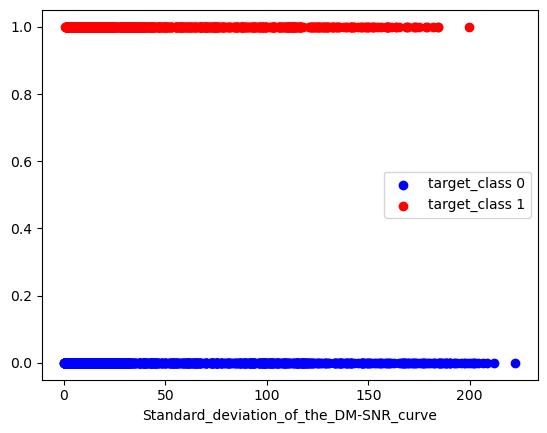

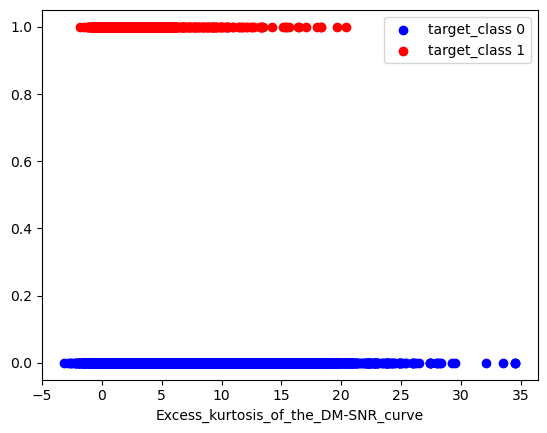

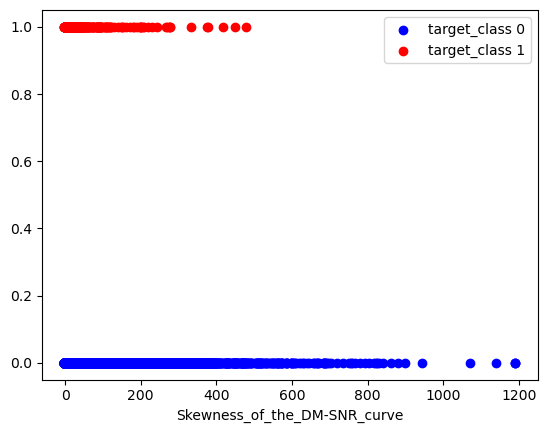

In [347]:
# Separate data by target_class
class_0_data = df[df['target_class'] == 0]
class_1_data = df[df['target_class'] == 1]

# Create scatter plots
for column in df.columns[:-1]:  # Exclude the target_class column
    plt.figure()
    plt.scatter(class_0_data[column], [0] * len(class_0_data), color='blue', label='target_class 0')
    plt.scatter(class_1_data[column], [1] * len(class_1_data), color='red', label='target_class 1')
    plt.xlabel(column)
    plt.legend()
    plt.show()

#### It would appear that the columns are very correlated to each otehr, so for now there we will not drop any columns, but we might at a later stage. I have decided to not remove any outliers for the moment because there are so many possilbe outleirs relatively speaking to the dataset, and removing them all have a significant effect on the prediction model, so we will keep them for now

#### Now that our data is cleaned and prepared, we can move forward

# Task 2:

#### We now need to normalize and standardize the data where necessary
#### Lets view our data distribution in the form of a histogram

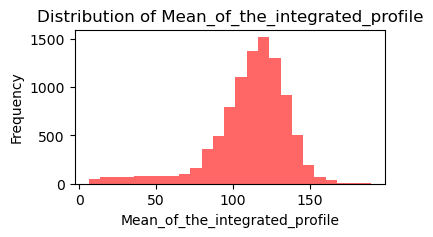

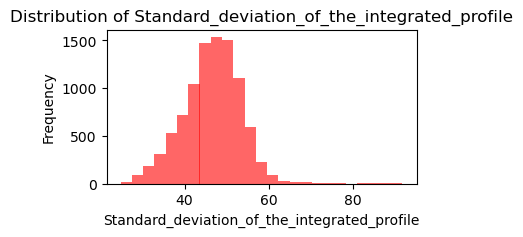

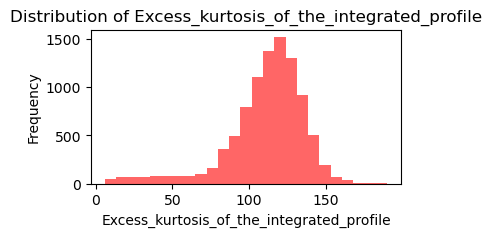

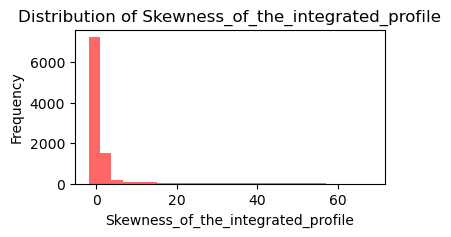

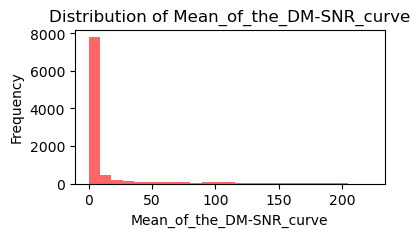

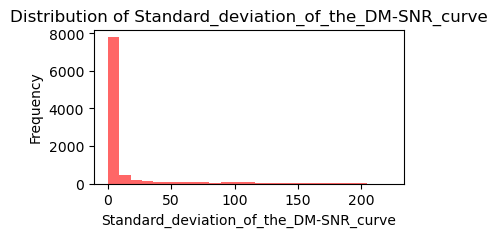

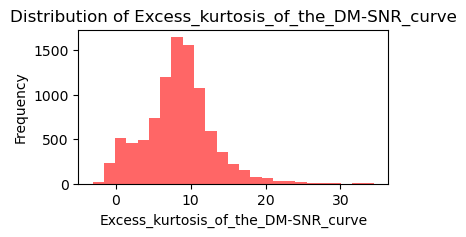

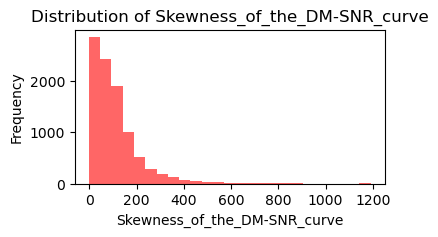

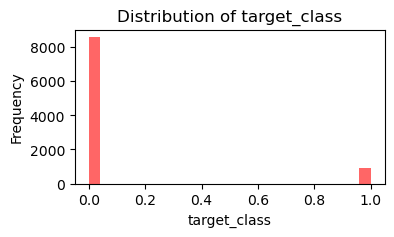

In [348]:
for col in df.columns:
    plt.figure(figsize=(4, 2))
    plt.hist(df[col], bins=25, color='r', alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

#### I am going to use a robust `StandardScaler` to standardise the data in my dataframe, because the datafram contains a lot of outliers and the standard scaler is robust to outliers

In [349]:
#Improt robust scaler from sklearn
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler and fit and transform the features using RobustScaler
scaler = RobustScaler()
numeric_columns = df.select_dtypes(include=['float64'])
numeric_columns_normalized = scaler.fit_transform(numeric_columns)
df_numeric_normalized = pd.DataFrame(numeric_columns_normalized, columns=numeric_columns.columns)
df.iloc[:, :8] = df_numeric_normalized.iloc[:, :8]
df.head(10)

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,target_class
0,1.143750,1.035603,1.143750,-0.754235,15.935545,15.935545,-1.846745,-0.785429,0.0
1,1.052381,0.314475,1.052381,-0.387481,0.006611,0.006611,-0.126274,-0.081394,0.0
2,-0.346131,-0.439206,-0.346131,0.489826,0.035179,0.035179,-0.225210,-0.091827,0.0
3,0.073810,1.244997,0.073810,-0.758279,-0.229725,-0.229725,0.388994,0.600448,0.0
4,-0.689286,-0.190164,-0.689286,0.518435,-0.206351,-0.206351,0.189075,0.138011,0.0
5,0.320536,0.290136,0.320536,-0.428060,0.369732,0.369732,-0.283057,-0.277013,0.0
7,0.293452,-0.649715,0.293452,0.376641,-0.198560,-0.198560,0.343674,0.224246,0.0
8,0.166964,0.118310,0.166964,-0.429202,1.441624,1.441624,-0.771558,-0.591711,0.0
9,-0.550893,0.210226,-0.550893,0.165040,-0.212017,-0.212017,0.227579,0.168739,0.0
10,0.951786,0.862188,0.951786,-0.494548,-0.204698,-0.204698,0.426104,0.515669,0.0


In [350]:
#Double check for null values
df.dtypes.isnull().sum()

0

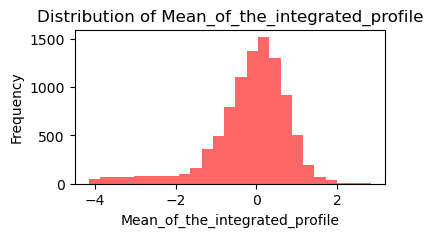

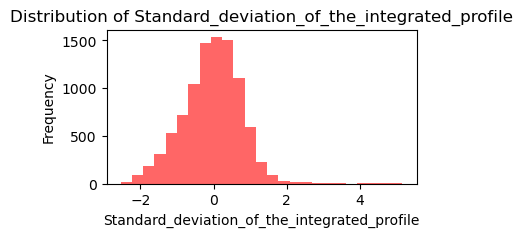

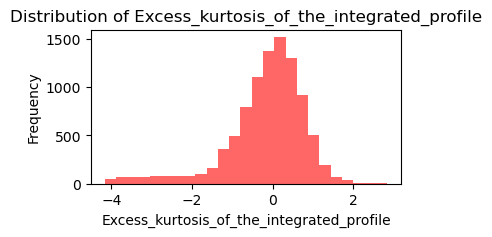

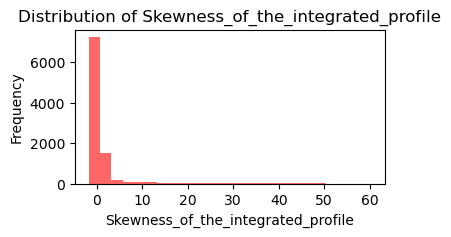

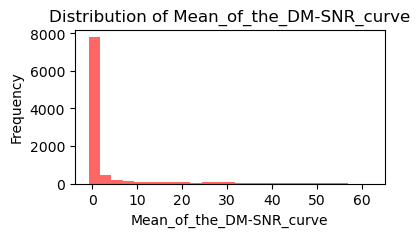

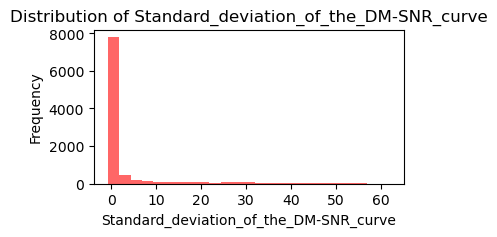

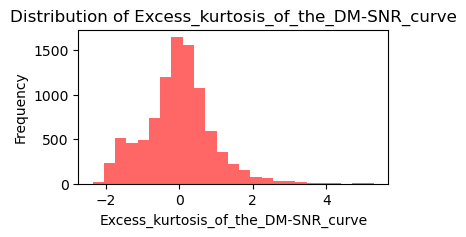

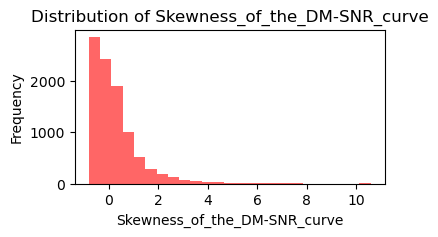

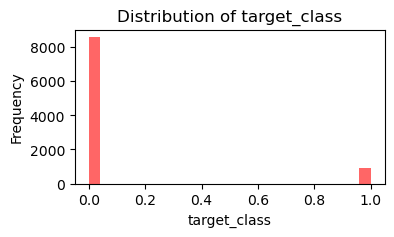

In [351]:
#Now lets view the normalised data
for col in df.columns:
    plt.figure(figsize=(4, 2))
    plt.hist(df[col], bins=25, color='r', alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

# Task 3:

#### Firstly, lets revist the ratio of 0s and 1s in our `target_class` i.e whether or not our dataset is imbalanced

In [352]:
import pandas as pd
target_column = df['target_class']

# Calculate the percentage of 1s in the target class
percentage_of_ones = (target_column.value_counts(normalize=True)[1] * 100)
percentage_of_zeros = (target_column.value_counts(normalize=True)[0] * 100)

#Show results
print(f"Percentage of 0s in the target class: {percentage_of_zeros:.2f}%")
print(f"Percentage of 1s in the target class: {percentage_of_ones:.2f}%")


Percentage of 0s in the target class: 90.59%
Percentage of 1s in the target class: 9.41%


#### 

#### As we can see, there is a significant class imbalance in our `target_class`. Therfore, I will use `balanced accuracy` to compensate for this as it is more appropriate metric than `simple accuracy` when dealing with imbalanced datasets, such as this

# Task 4:

#### Due to our dataset being imbalanced, I will use `Balanced Accuracy` and `Startified K-fold` as my evaulation measure and methodolgy, as these are better approaches for datasets that are imbalanced and we can preserve the distribution of our dataset

In [353]:
#Firstly lets split the data in to training and testing sets to be ready to be evaluated
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

df['target_class'] = df['target_class'].astype('category')

X = df.drop('target_class', axis=1)
y = df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X.isnull().sum()

Mean_of_the_integrated_profile                  0
Standard_deviation_of_the_integrated_profile    0
Excess_kurtosis_of_the_integrated_profile       0
Skewness_of_the_integrated_profile              0
Mean_of_the_DM-SNR_curve                        0
Standard_deviation_of_the_DM-SNR_curve          0
Excess_kurtosis_of_the_DM-SNR_curve             0
Skewness_of_the_DM-SNR_curve                    0
dtype: int64

#### To effectively and concisely compare decision trees, kNN, and SVMs, and the effect of various parameter settings on our results, I will use a grid search to quickly test the various approaches and parameter changes simultaneously to prevent code duplication

#### Decision Tree Classifier:

In [354]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=1)

# Define the Decision Tree parameters and values to search
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object for hyperparameter tuning
# here we are using cv=10, meaning 10-fold cross-validation
gridSearch = GridSearchCV(
    estimator=dt_classifier,
    param_grid=dt_params,
    scoring='balanced_accuracy',
    cv=10,
    n_jobs=1
)

# Fit the GridSearchCV on your data
gridSearch.fit(X, y.values.ravel())

# Get the best hyperparameters and scores
bestIndex = gridSearch.best_index_
cvScores = gridSearch.cv_results_['mean_test_score']
cvScoresStd = gridSearch.cv_results_['std_test_score']
dt_meanScore = round(cvScores[bestIndex], 3)
dt_std = round(cvScoresStd[bestIndex], 3)
dt_best_balanced_accuracy_train = (f"{cvScores[bestIndex]:.3f} +/- {cvScoresStd[bestIndex]:.3f}")

# Show results
print(f"Best Parameters: {gridSearch.best_params_}")
print(f"Cross-validated Balanced Accuracy Score of the best model: {dt_best_balanced_accuracy_train}")

#Store Results:
dt_original_balanaced_accuracy_score = dt_best_balanced_accuracy_train


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Cross-validated Balanced Accuracy Score of the best model: 0.904 +/- 0.017


#### KNN Classifier:

In [355]:
#Define kNN Classifier
knn_classifier = KNeighborsClassifier()

#Define paramteres for KNN and values to search
knn_params = {
    'n_neighbors': [2, 4, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
}

#Define GridSearch and fit data
gridSearch = GridSearchCV(
    estimator=knn_classifier, 
    param_grid=knn_params, 
    scoring='balanced_accuracy', 
    cv=10, 
    n_jobs=1)
gridSearch.fit(X, y.values.ravel())

# Get the best hyperparameters and scores
bestIndex = gridSearch.best_index_
cvScores = gridSearch.cv_results_['mean_test_score']
cvScoresStd = gridSearch.cv_results_['std_test_score']
knn_meanScore = round(cvScores[bestIndex], 3)
knn_std = round(cvScoresStd[bestIndex], 3)
knn_best_balanced_accuracy_train = (f"{cvScores[bestIndex]:.3f} +/- {cvScoresStd[bestIndex]:.3f}")

#Show results
print(f"Best Paramters: {gridSearch.best_params_}")
print(f"Cross-validated Balanced Accuracy Score pf the best model: {knn_best_balanced_accuracy_train}")

#Store Results:
knn_original_balanaced_accuracy_score = knn_best_balanced_accuracy_train


Best Paramters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Cross-validated Balanced Accuracy Score pf the best model: 0.895 +/- 0.020


#### SVM Classifier - Linear:

In [356]:
# Define Linear SVM Classifier
svc_linear_classifier = SVC(kernel='linear')

# Define Linear SVM parameters
linear_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

#Define GridSearch and fit data
gridSearch = GridSearchCV(estimator=svc_linear_classifier, param_grid=linear_params, cv=5, scoring='balanced_accuracy', n_jobs=-1)
gridSearch.fit(X, y.values.ravel())

# Get the best hyperparameters and scores
bestIndex = gridSearch.best_index_
cvScores = gridSearch.cv_results_['mean_test_score']
cvScoresStd = gridSearch.cv_results_['std_test_score']
linear_meanScore = round(cvScores[bestIndex], 3) # Used Later On
linear_std = round(cvScoresStd[bestIndex], 3) # Used Later On
svc_linear_best_balanced_accuracy_train = (f"{cvScores[bestIndex]:.3f} +/- {cvScoresStd[bestIndex]:.3f}")

# Show results:
print(f"Best Parameters: {gridSearch.best_params_}")
print(f"Cross-validated Balanced Accuracy score of the best model: {svc_linear_best_balanced_accuracy_train}")

#Store Results:
svm_linear_original_balanaced_accuracy_score = svc_linear_best_balanced_accuracy_train

Best Parameters: {'C': 100}
Cross-validated Balanced Accuracy score of the best model: 0.874 +/- 0.007


#### SVM Classifier - Poly:

In [357]:
# Define Poly SVM Classifier
svc_poly_classifier = SVC(kernel='poly')

# Define Poly SVM parameters
poly_params = {
    'C': [0.01, 0.1, 1],
    'degree': [2,3,4],  # Degree of the polynomial kernel function
    'gamma': ['scale'],  # Kernel coefficient
    'coef0': [0.0, 1.0]  # Independent term in kernel function
}

#Define GridSearch and fit data
gridSearch = GridSearchCV(estimator=svc_poly_classifier, param_grid=poly_params, cv=5, scoring='balanced_accuracy', n_jobs=-1)
gridSearch.fit(X, y.values.ravel())

# Get the best hyperparameters and scores
bestIndex = gridSearch.best_index_
cvScores = gridSearch.cv_results_['mean_test_score']
cvScoresStd = gridSearch.cv_results_['std_test_score']
poly_meanScore = round(cvScores[bestIndex], 3) # Used Later On
poly_std = round(cvScoresStd[bestIndex], 3) # Used Later On
svc_poly_best_balanced_accuracy_train = (f"{cvScores[bestIndex]:.3f} +/- {cvScoresStd[bestIndex]:.3f}")

# Show results:
print(f"Best Parameters: {gridSearch.best_params_}")
print(f"Cross-validated Balanced Accuracy score of the best model: {svc_poly_best_balanced_accuracy_train}")

#Store Results:
svm_poly_original_balanaced_accuracy_score = svc_poly_best_balanced_accuracy_train

Best Parameters: {'C': 1, 'coef0': 1.0, 'degree': 4, 'gamma': 'scale'}
Cross-validated Balanced Accuracy score of the best model: 0.885 +/- 0.009


#### SVM Classifier - RBF:

In [358]:
# Define RBF SVM Classifier
svc_rbf_classifier = SVC(kernel='rbf')

# Define RBF SVM parameters
rbf_params = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100],  # Kernel coefficient
}

#Define GridSearch and fit data
gridSearch = GridSearchCV(estimator=svc_rbf_classifier, param_grid=rbf_params, cv=5, scoring='balanced_accuracy', n_jobs=-1)
gridSearch.fit(X, y.values.ravel())

# Get the best hyperparameters and scores
bestIndex = gridSearch.best_index_
cvScores = gridSearch.cv_results_['mean_test_score']
cvScoresStd = gridSearch.cv_results_['std_test_score']
rbf_meanScore = round(cvScores[bestIndex], 3) # Used Later On
rbf_std = round(cvScoresStd[bestIndex], 3) # Used Later On
svc_rbf_best_balanced_accuracy_train = (f"{cvScores[bestIndex]:.3f} +/- {cvScoresStd[bestIndex]:.3f}")

# Show results:
print(f"Best Parameters: {gridSearch.best_params_}")
print(f"Cross-validated Balanced Accuracy score of the best model: {svc_rbf_best_balanced_accuracy_train}")

#Store Results:
svm_rbf_original_balanaced_accuracy_score = svc_rbf_best_balanced_accuracy_train

Best Parameters: {'C': 100, 'gamma': 'auto'}
Cross-validated Balanced Accuracy score of the best model: 0.905 +/- 0.005


#### SVM Classifier - Sigmoid

In [359]:
# Define Sigmoid SVM Classifier
svc_sigmoid_classifier = SVC(kernel='sigmoid')

# Define Sigmoid SVM parameters
sigmoid_params = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100],  # Kernel coefficient
    'coef0': [0.0, 0.1, 0.5, 1, 2]  # Independent term in kernel function
}

#Define GridSearch and fit data
gridSearch = GridSearchCV(estimator=svc_sigmoid_classifier, param_grid=sigmoid_params, cv=5, scoring='balanced_accuracy', n_jobs=-1)
gridSearch.fit(X, y.values.ravel())

# Get the best hyperparameters and scores
bestIndex = gridSearch.best_index_
cvScores = gridSearch.cv_results_['mean_test_score']
cvScoresStd = gridSearch.cv_results_['std_test_score']
sigmoid_meanScore = round(cvScores[bestIndex], 3) # Used Later On
sigmoid_std = round(cvScoresStd[bestIndex], 3) # Used Later On
svc_sigmoid_best_balanced_accuracy_train = (f"{cvScores[bestIndex]:.3f} +/- {cvScoresStd[bestIndex]:.3f}")

# Show results:
print(f"Best Parameters: {gridSearch.best_params_}")
print(f"Cross-validated Balanced Accuracy score of the best model: {svc_sigmoid_best_balanced_accuracy_train}")

#Store Results:
svm_sigmoid_original_balanaced_accuracy_score = svc_sigmoid_best_balanced_accuracy_train

Best Parameters: {'C': 0.1, 'coef0': 0.0, 'gamma': 'scale'}
Cross-validated Balanced Accuracy score of the best model: 0.687 +/- 0.035


### Compare Results:

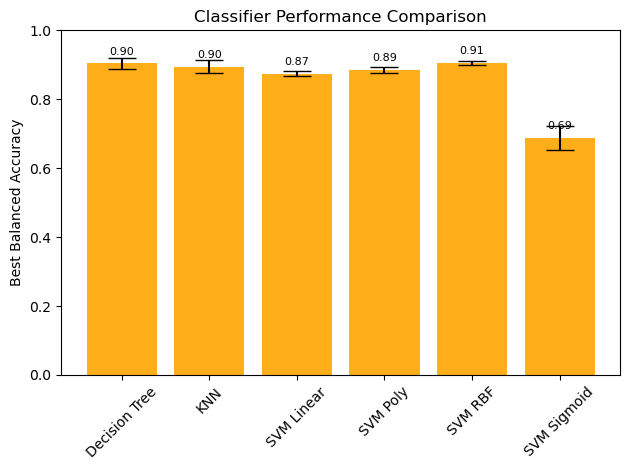

In [360]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names and their respective scores (replace this with your actual data)
classifiers = ['Decision Tree', 'KNN', 'SVM Linear', 'SVM Poly', 'SVM RBF', 'SVM Sigmoid']
mean_scores = [dt_meanScore, knn_meanScore, linear_meanScore, poly_meanScore, rbf_meanScore, sigmoid_meanScore]
std_devs = [dt_std, knn_std, linear_std, poly_std, rbf_std, sigmoid_std]

# Creating the bar plot with error bars representing the standard deviation
fig, ax = plt.subplots()
x_pos = np.arange(len(classifiers))
ax.bar(x_pos, mean_scores, yerr=std_devs, align='center', alpha=0.9, ecolor='black', capsize=10, color='orange')
ax.set_xticks(x_pos)
ax.set_xticklabels(classifiers, rotation=45)  # Rotates the labels for better readability
ax.set_ylim([0, 1]) 

ax.set_ylabel('Best Balanced Accuracy')
ax.set_title('Classifier Performance Comparison')

# Adding the data labels to the bars
for i, (mean, std) in enumerate(zip(mean_scores, std_devs)):
    ax.text(i, mean + 0.02, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


#### As we can clearly see from the graph, `Decision Tree` and `SVM RBF` performed the best, as SVM RBF and DT are the classifiers best suited to our unbalanced dataset. However, it is worth noting that `KNN`, `SVM Linear` and `SVM Poly` also performed very well, whereas `SVM Sigmoid` performed poorly in comparison to the other classifiers

#### `Decision Tree` can be prone to overfitting with ranodm flucations or noise in our dataset, which clearly was not the case here due to our efficient cleaning of the data in the earlt stages of the assignment. We can see that the most efficient depth we provided was 10, which would indicate that not only the classifier is prone to overfitting as I already mentioned, but also that the data was not complex enough for such a deep tree

#### As for `SVM RBF` performing well, this I believe is due to the robustness of the classifier, as well as the ability of the this classifier to capture non-linear relationships that are present within our dataset

#### In contrast, it would appear that `SVM Sigmoid` was prone to overfitting, even with the range of hyper parameters we provided


#### As for `SVM Linear`, I was quite surprised it performed so well given that it usually is not suitable for datasets with many dimensions such as our dataset

#### I was also surpirsed that `SVM Poly` did not perform the best out of all of the classifiers, as I would have though it would have performed the best with the multi-dimensional data that it is generally suited for. That being said, the gap between it and the other top performing classifiers is very narrow so its not concerning, it still performed very well. Using a higher degree would have set it out in front

#### It is of no surprise at all that `KNN` performed as well as it did as the classifier is very well suited to our data. As we can see, k=5 was the most efficint value for number of neighbors, which is unsurprising as anything more was proabably overfitting, and I was expecting Euclidean to prevail over Manhattan as a metric due to the higher dimensionality of our dataset

# Task 5:

#### As I previously mentioned, our datset contains quite a lot of outliers, as well as some non-linear relationships. For these reasons, I am going to use `Information Gain` as my filter of choice. Another benefit of using this filter is that it shouldn't require much compouting power

In [361]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Drop the target column to get the feature columns
features = df.drop('target_class', axis=1)

# Calculate information gain using mutual_info_classif
info_gain = mutual_info_classif(features, df['target_class'])

# Create a DataFrame to associate each feature with its information gain
feature_info_gain = pd.DataFrame({'Feature': features.columns, 'Information Gain': info_gain})

# Sort the features based on their information gain
feature_info_gain = feature_info_gain.sort_values(by='Information Gain', ascending=False)

top_3_features_filter = feature_info_gain.head(3)
bottom_3_features_filter = feature_info_gain.tail(3)

# Print Results:
print("Top 3 most discriminative features:")
print(top_3_features_filter)
print("\nTop 3 least discriminative features:")
print(bottom_3_features_filter)


Top 3 most discriminative features:
                                     Feature  Information Gain
3         Skewness_of_the_integrated_profile          0.200896
2  Excess_kurtosis_of_the_integrated_profile          0.194874
0             Mean_of_the_integrated_profile          0.194820

Top 3 least discriminative features:
                                        Feature  Information Gain
5        Standard_deviation_of_the_DM-SNR_curve          0.113637
6           Excess_kurtosis_of_the_DM-SNR_curve          0.111002
1  Standard_deviation_of_the_integrated_profile          0.094129


#### Now we want to run the SVM classifiers with the four kernels on the top three and the bottom three features

#### Note that I am running each kernel with the best parameters for each that we found in the previous task

In [362]:
#Import the nedeed libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

#### SVM - Linear

In [363]:
top_3_feature_names = top_3_features_filter['Feature'].values

# Extract only the top 3 features from the original dataframe
top_3_X = df[top_3_feature_names]
y = df['target_class'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(top_3_X, y, test_size=0.2, random_state=1)

# Initialize the SVM model with a linear kernel
svm_model = SVC(C=100, kernel='linear', random_state=1)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate imbalanced accuracy
imbalanced_acc = balanced_accuracy_score(y_test, y_pred)
linear_top_score = imbalanced_acc

#Show Results
print(f"Imbalanced Accuracy using SVM Linear with top 3 features: {linear_top_score}")


Imbalanced Accuracy using SVM Linear with top 3 features: 0.8530821677092851


In [364]:
bottom_3_feature_names = bottom_3_features_filter['Feature'].values

# Extract only the bottom 3 features from the original dataframe
bottom_3_X = df[bottom_3_feature_names]
y = df['target_class'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bottom_3_X, y, test_size=0.2, random_state=1)

# Initialize the SVM model with a linear kernel
svm_model = SVC(C=100, kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate imbalanced accuracy
imbalanced_acc = balanced_accuracy_score(y_test, y_pred)
linear_bottom_score = imbalanced_acc

#Show Results
print(f"Imbalanced Accuracy using SVM Linear with bottom 3 features: {linear_bottom_score}")


Imbalanced Accuracy using SVM Linear with bottom 3 features: 0.815799184648907


#### SVM - Poly

In [365]:
top_3_feature_names = top_3_features_filter['Feature'].values

# Extract only the top 3 features from the original dataframe
top_3_X = df[top_3_feature_names]
y = df['target_class'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(top_3_X, y, test_size=0.2, random_state=1)

# Initialize the SVM model with a poly kernel
svm_model = SVC(C=1, coef0=1, degree=4, gamma='scale', kernel='poly', random_state=1)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate imbalanced accuracy
imbalanced_acc = balanced_accuracy_score(y_test, y_pred)
poly_top_score = imbalanced_acc

#Show Results
print(f"Imbalanced Accuracy using SVM Poly with top 3 features: {poly_top_score}")

Imbalanced Accuracy using SVM Poly with top 3 features: 0.8619403247346594


In [366]:
bottom_3_feature_names = bottom_3_features_filter['Feature'].values

# Extract only the bottom 3 features from the original dataframe
bottom_3_X = df[bottom_3_feature_names]
y = df['target_class'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bottom_3_X, y, test_size=0.2, random_state=1)

# Initialize the SVM model with a poly kernel
svm_model = SVC(C=1, coef0=1, degree=4, gamma='scale', kernel='poly')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate imbalanced accuracy
imbalanced_acc = balanced_accuracy_score(y_test, y_pred)
poly_bottom_score = imbalanced_acc

#Show Results
print(f"Imbalanced Accuracy using SVM Poly with bottom 3 features: {poly_bottom_score}")


Imbalanced Accuracy using SVM Poly with bottom 3 features: 0.8141913263513039


#### SVM - RBF

In [367]:
top_3_feature_names = top_3_features_filter['Feature'].values

# Extract only the top 3 features from the original dataframe
top_3_X = df[top_3_feature_names]
y = df['target_class']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(top_3_X, y, test_size=0.2, random_state=1)

# Initialize the SVM model with a rbf kernel
svm_model = SVC(C=100, gamma='auto', kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate imbalanced accuracy
imbalanced_acc = balanced_accuracy_score(y_test, y_pred)
rbf_top_score = imbalanced_acc

#Show Results
print(f"Imbalanced Accuracy using SVM RBF with top 3 features: {rbf_top_score}")


Imbalanced Accuracy using SVM RBF with top 3 features: 0.8754551205454417


In [368]:
bottom_3_feature_names = bottom_3_features_filter['Feature'].values

# Extract only the bottom 3 features from the original dataframe
bottom_3_X = df[bottom_3_feature_names]
y = df['target_class'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bottom_3_X, y, test_size=0.2, random_state=1)

# Initialize the SVM model with a rbf kernel
svm_model = SVC(C=100, gamma='auto', kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate imbalanced accuracy
imbalanced_acc = balanced_accuracy_score(y_test, y_pred)
rbf_bottom_score = imbalanced_acc

#Show Results
print(f"Imbalanced Accuracy using SVM RBF with bottom 3 features: {rbf_bottom_score}")


Imbalanced Accuracy using SVM RBF with bottom 3 features: 0.8304667182118508


#### SVM - Sigmoid

In [369]:
top_3_feature_names = top_3_features_filter['Feature'].values

# Extract only the top 3 features from the original dataframe
top_3_X = df[top_3_feature_names]
y = df['target_class']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(top_3_X, y, test_size=0.2, random_state=1)

# Initialize the SVM model with a sigmoid kernel
svm_model = SVC(C=0.1, coef0=0.0, gamma='scale', kernel='sigmoid')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate imbalanced accuracy
imbalanced_acc = balanced_accuracy_score(y_test, y_pred)
sigmoid_top_score = imbalanced_acc

#Show Results
print(f"Imbalanced Accuracy using SVM Sigmoid with top 3 features: {sigmoid_top_score}")

Imbalanced Accuracy using SVM Sigmoid with top 3 features: 0.5589899486891122


In [370]:
bottom_3_feature_names = bottom_3_features_filter['Feature'].values

# Extract only the bottom 3 features from the original dataframe
bottom_3_X = df[bottom_3_feature_names]
y = df['target_class']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bottom_3_X, y, test_size=0.2, random_state=1)

# Initialize the SVM model with a sigmoid kernel
svm_model = SVC(C=0.1, coef0=0.0, gamma='scale', kernel='sigmoid')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate imbalanced accuracy
imbalanced_acc = balanced_accuracy_score(y_test, y_pred)
sigmoid_bottom_score = imbalanced_acc

#Show Results
print(f"Imbalanced Accuracy using SVM Sigmoid with bottom 3 features: {sigmoid_bottom_score}")


Imbalanced Accuracy using SVM Sigmoid with bottom 3 features: 0.6535777043649399


#### Compare Results by plotting on a graph

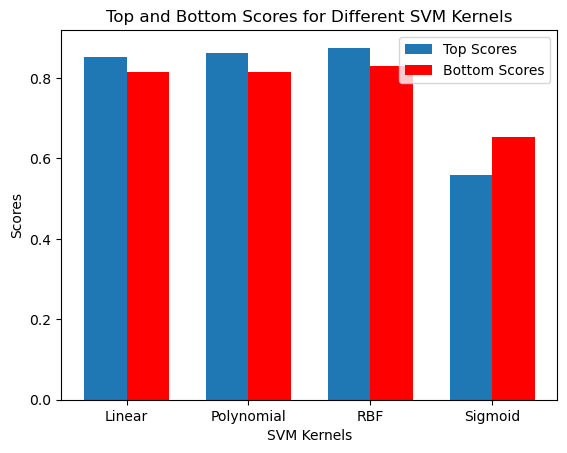

In [371]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating means for top and bottom scores
top_means = [np.mean(linear_top_score), np.mean(poly_top_score), np.mean(rbf_top_score), np.mean(sigmoid_top_score)]
bottom_means = [np.mean(linear_bottom_score), np.mean(poly_bottom_score), np.mean(rbf_bottom_score), np.mean(sigmoid_bottom_score)]

# The number of SVM types
num_SVMs = len(top_means)
ind = np.arange(num_SVMs)  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
bar1 = ax.bar(ind, top_means, width, label='Top Scores')
bar2 = ax.bar(ind + width, bottom_means, width, label='Bottom Scores', color='red')

# Adding labels, title, and customizing the plot
ax.set_xlabel('SVM Kernels')
ax.set_ylabel('Scores')
ax.set_title('Top and Bottom Scores for Different SVM Kernels')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Linear', 'Polynomial', 'RBF', 'Sigmoid'))
ax.legend()

# Show plot
plt.show()


#### We can instantly see that the top 3 features performed better than the bottom 3 features when used with all of the kernels except for the sigmoid kernel. However, the top 3 features did not perform as well compared to using the full set of features as we did in the previous task, indicating that we should be using all of our features for this particular dataset

# Task 6

#### `Forward Sequntial Search` is beneficial to use when we are dealing with highly predicitve features, however, as we saw from our filter methods using our top 3 features, there was quite a significant difference in performance between using the full set of features vs the top 3. For this reason, and because of the computational cost of this task, I am going to use `Backward Sequential Search` as my wrapper of choice

In [372]:
from mlxtend.plotting import plot_sequential_feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


#Split the dataset in half to save computing power
df_half = df.sample(frac=0.5)

#Split the data into training and testing sets
X = df_half.drop(columns=['target_class'])
y = df_half[['target_class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.7)

#### Decision Tree

Number of features selected: 2
Features selected: ('Standard_deviation_of_the_integrated_profile', 'Skewness_of_the_integrated_profile')


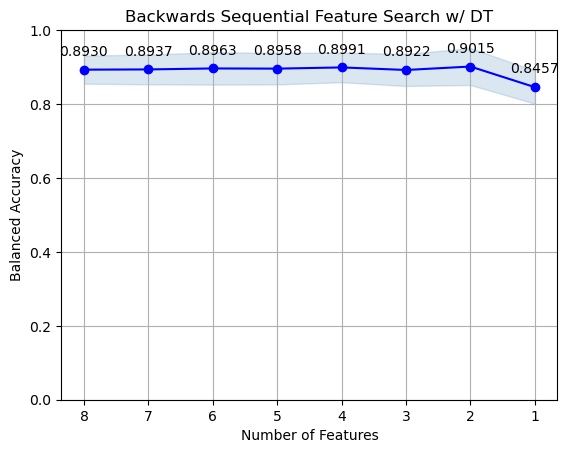

In [373]:
#Define classifier:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split=10, random_state=1) #Most efficient params

#Define Backward Sequential Search:
sfs_backward = SFS(
    classifier,
    k_features='best',
    forward=False,
    floating=False,
    scoring='balanced_accuracy',
    cv=10,
)

#Fit data and print results:
sfs_backward = sfs_backward.fit(X_train, y_train.values.ravel())

dt_featres_selected_num = len(sfs_backward.k_feature_idx_)
dt_features_selected = sfs_backward.k_feature_names_
print(f"Number of features selected: {dt_featres_selected_num}")
print(f"Features selected: {dt_features_selected}")

# Plot and display the results
fig1 = plot_sequential_feature_selection(sfs_backward.get_metric_dict(), ylabel='Balanced Accuracy')
plt.gca().invert_xaxis()
plt.ylim([0, 1])
plt.title(f'Backwards Sequential Feature Search w/ DT')

x_values = list(sfs_backward.get_metric_dict().keys())
y_values = [metric['avg_score'] for metric in sfs_backward.get_metric_dict().values()]

for x, v in sfs_backward.get_metric_dict().items():
    if isinstance(v['avg_score'], (float)):
        plt.annotate(f'{v["avg_score"]:.4f}', (x, v["avg_score"]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid()
plt.show()


#### KNN

Number of features selected: 4
Features selected: ('Mean_of_the_integrated_profile', 'Standard_deviation_of_the_integrated_profile', 'Skewness_of_the_integrated_profile', 'Skewness_of_the_DM-SNR_curve')


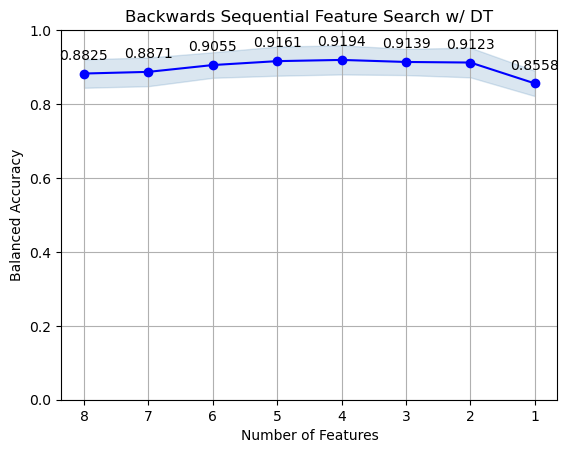

In [374]:
#Define classifier:
classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights= 'uniform') #Most efficient params

#Define Backward Sequential Search:
sfs_backward = SFS(
    classifier,
    k_features='best',
    forward=False,
    floating=False,
    scoring='balanced_accuracy',
    cv=10,
)

#Fit data and print results:
sfs_backward = sfs_backward.fit(X_train, y_train.values.ravel())

knn_features_selected_num = len(sfs_backward.k_feature_idx_)
knn_features_selected = sfs_backward.k_feature_names_
print(f"Number of features selected: {knn_features_selected_num}")
print(f"Features selected: {knn_features_selected}")

#Plot Results:
fig1 = plot_sequential_feature_selection(sfs_backward.get_metric_dict(), ylabel='Balanced Accuracy')
plt.gca().invert_xaxis()
plt.ylim([0, 1])
plt.title(f'Backwards Sequential Feature Search w/ DT')

x_values = list(sfs_backward.get_metric_dict().keys())
y_values = [metric['avg_score'] for metric in sfs_backward.get_metric_dict().values()]

for x, v in sfs_backward.get_metric_dict().items():
    if isinstance(v['avg_score'], (float)):
        plt.annotate(f'{v["avg_score"]:.4f}', (x, v["avg_score"]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid()
plt.show()

#### SVM - Linear

Number of features selected: 7
Features selected: ('Mean_of_the_integrated_profile', 'Standard_deviation_of_the_integrated_profile', 'Excess_kurtosis_of_the_integrated_profile', 'Skewness_of_the_integrated_profile', 'Mean_of_the_DM-SNR_curve', 'Standard_deviation_of_the_DM-SNR_curve', 'Excess_kurtosis_of_the_DM-SNR_curve')


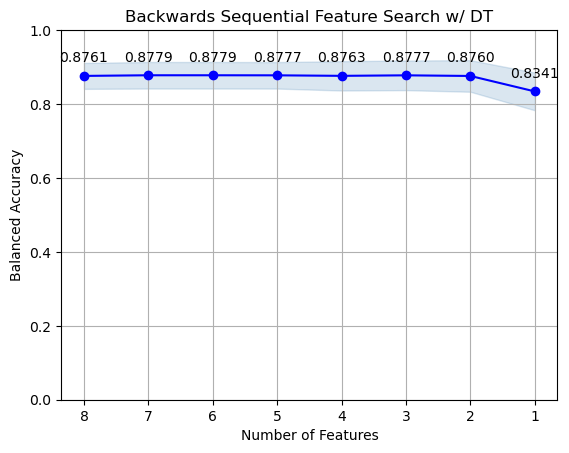

In [375]:
#Define classifier:
classifier = SVC(C=100, kernel='linear', random_state=1) #Most efficient params

#Define Backward Sequential Search:
sfs_backward = SFS(
    classifier,
    k_features='best',
    forward=False,
    floating=False,
    scoring='balanced_accuracy',
    cv=10,
)

#Fit data and print results:
sfs_backward = sfs_backward.fit(X_train, y_train.values.ravel())

svm_linear_features_selected_num = len(sfs_backward.k_feature_idx_)
svm_linear_features_selected = sfs_backward.k_feature_names_
print(f"Number of features selected: {svm_linear_features_selected_num}")
print(f"Features selected: {svm_linear_features_selected}")

#Plot Results:
fig1 = plot_sequential_feature_selection(sfs_backward.get_metric_dict(), ylabel='Balanced Accuracy')
plt.gca().invert_xaxis()
plt.ylim([0, 1])
plt.title(f'Backwards Sequential Feature Search w/ DT')

x_values = list(sfs_backward.get_metric_dict().keys())
y_values = [metric['avg_score'] for metric in sfs_backward.get_metric_dict().values()]

for x, v in sfs_backward.get_metric_dict().items():
    if isinstance(v['avg_score'], (float)):
        plt.annotate(f'{v["avg_score"]:.4f}', (x, v["avg_score"]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid()
plt.show()

#### SVM - Poly

Number of features selected: 5
Features selected: ('Mean_of_the_integrated_profile', 'Standard_deviation_of_the_integrated_profile', 'Excess_kurtosis_of_the_integrated_profile', 'Skewness_of_the_integrated_profile', 'Skewness_of_the_DM-SNR_curve')


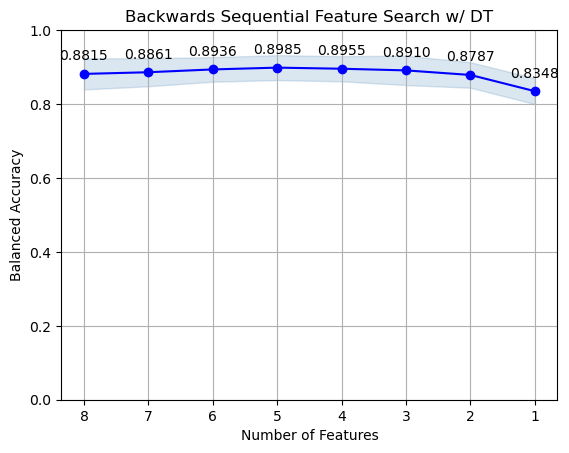

In [376]:
#Define classifier:
classifier = SVC(C=1, coef0=1, degree=4, gamma='scale', kernel='poly', random_state=1) #Most efficient params

#Define Backward Sequential Search:
sfs_backward = SFS(
    classifier,
    k_features='best',
    forward=False,
    floating=False,
    scoring='balanced_accuracy',
    cv=10,
)

#Fit data and print results:
sfs_backward = sfs_backward.fit(X_train, y_train.values.ravel())

svm_poly_features_selected_num = len(sfs_backward.k_feature_idx_)
svm_poly_features_selected = sfs_backward.k_feature_names_
print(f"Number of features selected: {svm_poly_features_selected_num}")
print(f"Features selected: {svm_poly_features_selected }")

#Plot Results:
fig1 = plot_sequential_feature_selection(sfs_backward.get_metric_dict(), ylabel='Balanced Accuracy')
plt.gca().invert_xaxis()
plt.ylim([0, 1])
plt.title(f'Backwards Sequential Feature Search w/ DT')

x_values = list(sfs_backward.get_metric_dict().keys())
y_values = [metric['avg_score'] for metric in sfs_backward.get_metric_dict().values()]

for x, v in sfs_backward.get_metric_dict().items():
    if isinstance(v['avg_score'], (float)):
        plt.annotate(f'{v["avg_score"]:.4f}', (x, v["avg_score"]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid()
plt.show()

#### SVM - RBF

Number of features selected: 6
Features selected: ('Mean_of_the_integrated_profile', 'Standard_deviation_of_the_integrated_profile', 'Skewness_of_the_integrated_profile', 'Mean_of_the_DM-SNR_curve', 'Excess_kurtosis_of_the_DM-SNR_curve', 'Skewness_of_the_DM-SNR_curve')


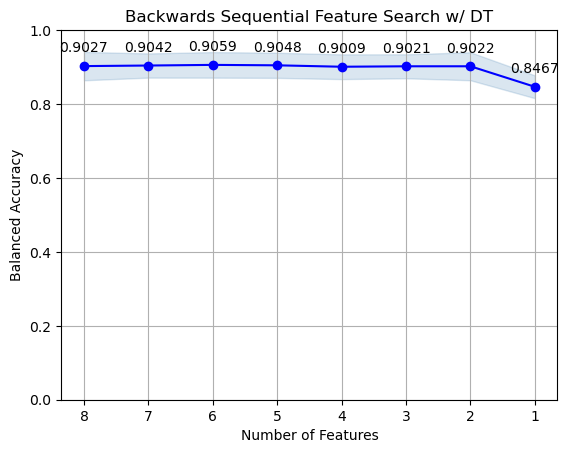

In [377]:
#Define classifier:
classifier = SVC(C=100, gamma='auto', kernel='rbf', random_state=1) #Most efficient params

#Define Backward Sequential Search:
sfs_backward = SFS(
    classifier,
    k_features='best',
    forward=False,
    floating=False,
    scoring='balanced_accuracy',
    cv=10,
)

#Fit data and print results:
sfs_backward = sfs_backward.fit(X_train, y_train.values.ravel())

svm_rbf_features_selected_num = len(sfs_backward.k_feature_idx_)
svm_rbf_features_selected = sfs_backward.k_feature_names_
print(f"Number of features selected: {svm_rbf_features_selected_num}")
print(f"Features selected: {svm_rbf_features_selected}")

#Plot Results:
fig1 = plot_sequential_feature_selection(sfs_backward.get_metric_dict(), ylabel='Balanced Accuracy')
plt.gca().invert_xaxis()
plt.ylim([0, 1])
plt.title(f'Backwards Sequential Feature Search w/ DT')

x_values = list(sfs_backward.get_metric_dict().keys())
y_values = [metric['avg_score'] for metric in sfs_backward.get_metric_dict().values()]

for x, v in sfs_backward.get_metric_dict().items():
    if isinstance(v['avg_score'], (float)):
        plt.annotate(f'{v["avg_score"]:.4f}', (x, v["avg_score"]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid()
plt.show()

#### SVM - Sigmoid

Number of features selected: 2
Features selected: ('Mean_of_the_DM-SNR_curve', 'Excess_kurtosis_of_the_DM-SNR_curve')


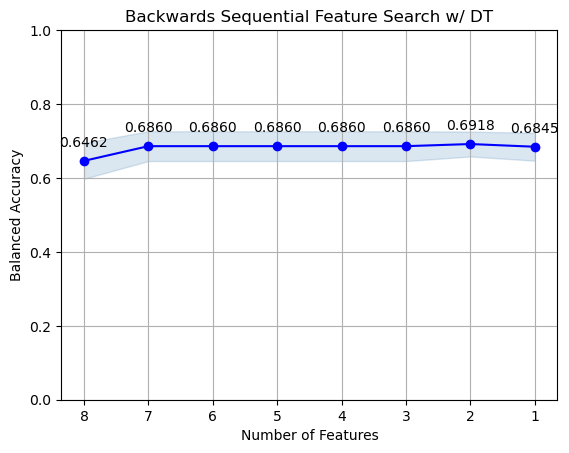

In [378]:
#Define classifier:
classifier = SVC(C=0.1, coef0=0.0, kernel="sigmoid", gamma= 'scale', random_state=1) #Most efficient params

#Define Backward Sequential Search:
sfs_backward = SFS(
    classifier,
    k_features='best',
    forward=False,
    floating=False,
    scoring='balanced_accuracy',
    cv=10,
)

#Fit data and print results:
sfs_backward = sfs_backward.fit(X_train, y_train.values.ravel())

svm_sigmoid_features_selected_num = len(sfs_backward.k_feature_idx_)
svm_sigmoid_features_selected = sfs_backward.k_feature_names_
print(f"Number of features selected: {svm_sigmoid_features_selected_num}")
print(f"Features selected: {svm_sigmoid_features_selected}")

#Plot Results:
fig1 = plot_sequential_feature_selection(sfs_backward.get_metric_dict(), ylabel='Balanced Accuracy')
plt.gca().invert_xaxis()
plt.ylim([0, 1])
plt.title(f'Backwards Sequential Feature Search w/ DT')

x_values = list(sfs_backward.get_metric_dict().keys())
y_values = [metric['avg_score'] for metric in sfs_backward.get_metric_dict().values()]

for x, v in sfs_backward.get_metric_dict().items():
    if isinstance(v['avg_score'], (float)):
        plt.annotate(f'{v["avg_score"]:.4f}', (x, v["avg_score"]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid()
plt.show()

## Results:
#### After running the code multiple times, it appears that the results fluctuate from run to run, meaning the number of features selected from each classifier changes slightly each time. So instead of manually recording the reustuts, I will print all of the current results together below. Every time it is run, the results between the number of features selected is always very close, which is what I suspect to be the main reason for the fluctuating results. Ties in the imbalanced accuracy scoring metric could lead to different feature selection each time

#### However, we still see some patterns. Its clear that `mean_of_the_integrated_profile`, `standard_deviation_of_the_integrated_profile`, and `sknewness_of_the_integrated_profile` appear in all of the feature selections every time, indidcating that these are the most discriminating features to predict the binary outcome of the dataset. `Excess_kurtosis_of_the_integrated_profile` also appears in all bar one of the classifiers selected features

### `Decision Tree:`

In [379]:
print(f"Number of features selected: {dt_featres_selected_num}")
count = 0
for feature in dt_features_selected:
    count += 1
    print(f"{count}: {feature}")

Number of features selected: 2
1: Standard_deviation_of_the_integrated_profile
2: Skewness_of_the_integrated_profile


### `KNN:`

In [380]:
print(f"Number of features selected: {knn_features_selected_num}")
count = 0
for feature in knn_features_selected:
    count += 1
    print(f"{count}: {feature}")

Number of features selected: 4
1: Mean_of_the_integrated_profile
2: Standard_deviation_of_the_integrated_profile
3: Skewness_of_the_integrated_profile
4: Skewness_of_the_DM-SNR_curve


### `SVM - Linear:`

In [381]:
print(f"Number of features selected: {svm_linear_features_selected_num}")
count = 0
for feature in svm_linear_features_selected:
    count += 1
    print(f"{count}: {feature}")

Number of features selected: 7
1: Mean_of_the_integrated_profile
2: Standard_deviation_of_the_integrated_profile
3: Excess_kurtosis_of_the_integrated_profile
4: Skewness_of_the_integrated_profile
5: Mean_of_the_DM-SNR_curve
6: Standard_deviation_of_the_DM-SNR_curve
7: Excess_kurtosis_of_the_DM-SNR_curve


### `SVM - Poly:`

In [382]:
print(f"Number of features selected: {svm_poly_features_selected_num}")
count = 0
for feature in svm_poly_features_selected:
    count += 1
    print(f"{count}: {feature}")

Number of features selected: 5
1: Mean_of_the_integrated_profile
2: Standard_deviation_of_the_integrated_profile
3: Excess_kurtosis_of_the_integrated_profile
4: Skewness_of_the_integrated_profile
5: Skewness_of_the_DM-SNR_curve


### `SVM - RBF:`

In [383]:
print(f"Number of features selected: {svm_rbf_features_selected_num}")
count = 0
for feature in svm_rbf_features_selected:
    count += 1
    print(f"{count}: {feature}")

Number of features selected: 6
1: Mean_of_the_integrated_profile
2: Standard_deviation_of_the_integrated_profile
3: Skewness_of_the_integrated_profile
4: Mean_of_the_DM-SNR_curve
5: Excess_kurtosis_of_the_DM-SNR_curve
6: Skewness_of_the_DM-SNR_curve


### `SVM - Sigmoid:`

In [384]:
print(f"Number of features selected: {svm_sigmoid_features_selected_num}")
count = 0
for feature in svm_sigmoid_features_selected:
    count += 1
    print(f"{count}: {feature}")

Number of features selected: 2
1: Mean_of_the_DM-SNR_curve
2: Excess_kurtosis_of_the_DM-SNR_curve


# Task 7

#### Now we want to compare the performance of different classifiers using the different feature subsets found in Tasks 5 and 6 and compare it to the results on original dataset that you reported in Task 4

#### `Decision Tree`

##### Top 3 features selected from task 6 (Wrapper)

In [385]:
# Extract the features from the DataFrame
selected_features = df[list(dt_features_selected)]
target = df['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)

# Initialize Classifier and predict
classifier = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split=10, random_state=1) # Best Params
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
dt_wrapper_top_3_accuracy = accuracy_score(y_test, y_pred)


In [386]:
#Compare Results:
print(f"Original Balanced Accuracy Score from Task 4: {dt_original_balanaced_accuracy_score}")
print(f"Top 3 Features selected from Wrapper Balanced Accuracy Score: {dt_wrapper_top_3_accuracy}")
#Note we were not asked to use a decision tree in task 5

Original Balanced Accuracy Score from Task 4: 0.904 +/- 0.017
Top 3 Features selected from Wrapper Balanced Accuracy Score: 0.9789362822538178


#### `KNN`

##### Top 3 Features Selected from Task 6 (Wrapper)

In [387]:
# Extract the features from the DataFrame
selected_features = df[list(knn_features_selected)]
target = df['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)

# Initialize Classifier and predict
classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights= 'uniform') #Most efficient params
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
knn_wrapper_top_3_accuracy = accuracy_score(y_test, y_pred)


In [388]:
#Compare Results:
print(f"Original Balanced Accuracy Score from Task 4: {knn_original_balanaced_accuracy_score}")
print(f"Top 3 Features selected from Wrapper Balanced Accuracy Score: {knn_wrapper_top_3_accuracy}")
#Note we were not asked to use a decision tree in task 5

Original Balanced Accuracy Score from Task 4: 0.895 +/- 0.020
Top 3 Features selected from Wrapper Balanced Accuracy Score: 0.9889415481832543


#### `SVM-Linear`

##### Top 3 Features Selected from Task 5 (Filter)

In [389]:
# Extract the features from the DataFrame
selected_features = df[list(top_3_feature_names)]
target = df['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)

# Initialize Classifier and predict
classifier = SVC(C=100, kernel='linear', random_state=1) # Most efficient Params
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
svm_linear_filter_top_3_accuracy = accuracy_score(y_test, y_pred)

##### Features Selected from Task 6 (Wrapper)

In [390]:
# Extract the features from the DataFrame
selected_features = df[list(svm_linear_features_selected)]
target = df['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)

# Initialize Classifier and predict
classifier = SVC(C=100, kernel='linear', random_state=1) # Most efficient Params
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
svm_linear_wrapper_top_3_accuracy = accuracy_score(y_test, y_pred)

In [391]:
#Compare Results:
print(f"Original Balanced Accuracy Score from Task 4: {svm_linear_original_balanaced_accuracy_score}")
print(f"Top 3 Features selected from Filter Balanced Accuracy Score: {svm_linear_filter_top_3_accuracy}")
print(f"Top 3 Features selected from Wrapper Balanced Accuracy Score: {svm_linear_wrapper_top_3_accuracy}")

Original Balanced Accuracy Score from Task 4: 0.874 +/- 0.007
Top 3 Features selected from Filter Balanced Accuracy Score: 0.9736703528172722
Top 3 Features selected from Wrapper Balanced Accuracy Score: 0.9784096893101633


#### `SVM-Poly`

##### Top 3 Features Selected from Task 5 (Filter)

In [392]:
# Extract the features from the DataFrame
selected_features = df[list(top_3_feature_names)]
target = df['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)

# Initialize Classifier and predict
classifier = SVC(C=1, coef0=1, degree=4, gamma='scale', kernel='poly', random_state=1) #Most efficient params
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
svm_poly_filter_top_3_accuracy = accuracy_score(y_test, y_pred)

##### Features Selected from Task 6 (Wrapper)

In [393]:
# Extract the features from the DataFrame
selected_features = df[list(svm_poly_features_selected)]
target = df['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)

# Initialize Classifier and predict
classifier = SVC(C=100, kernel='linear', random_state=1) # Most efficient Params
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
svm_poly_wrapper_top_3_accuracy = accuracy_score(y_test, y_pred)

In [394]:
#Compare Results:
print(f"Original Balanced Accuracy Score from Task 4: {svm_poly_original_balanaced_accuracy_score}")
print(f"Top 3 Features selected from Filter Balanced Accuracy Score: {svm_poly_filter_top_3_accuracy}")
print(f"Top 3 Features selected from Wrapper Balanced Accuracy Score: {svm_poly_wrapper_top_3_accuracy}")

Original Balanced Accuracy Score from Task 4: 0.885 +/- 0.009
Top 3 Features selected from Filter Balanced Accuracy Score: 0.9747235387045814
Top 3 Features selected from Wrapper Balanced Accuracy Score: 0.9778830963665087


#### `SVM-RBF`

##### Top 3 Features Selected from Task 5 (Filter)

In [395]:
# Extract the features from the DataFrame
selected_features = df[list(top_3_feature_names)]
target = df['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)

# Initialize Classifier and predict
classifier = SVC(C=100, gamma='auto', kernel='rbf', random_state=1) #Most efficient params
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
svm_rbf_filter_top_3_accuracy = accuracy_score(y_test, y_pred)

#### Features selected from Task 6 (Wrapper)

In [396]:
# Extract the features from the DataFrame
selected_features = df[list(svm_rbf_features_selected)]
target = df['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)

# Initialize Classifier and predict
classifier = SVC(C=100, kernel='linear', random_state=1) # Most efficient Params
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
svm_rbf_wrapper_top_3_accuracy = accuracy_score(y_test, y_pred)

In [397]:
#Compare Results:
print(f"Original Balanced Accuracy Score from Task 4: {svm_rbf_original_balanaced_accuracy_score}")
print(f"Top 3 Features selected from Filter Balanced Accuracy Score: {svm_rbf_filter_top_3_accuracy}")
print(f"Top 3 Features selected from Wrapper Balanced Accuracy Score: {svm_rbf_wrapper_top_3_accuracy}")

Original Balanced Accuracy Score from Task 4: 0.905 +/- 0.005
Top 3 Features selected from Filter Balanced Accuracy Score: 0.9741969457609269
Top 3 Features selected from Wrapper Balanced Accuracy Score: 0.9784096893101633


#### `SVM-Sigmoid`

##### Top 3 Features Selected from Task 5 (Filter)

In [398]:
# Extract the features from the DataFrame
selected_features = df[list(top_3_feature_names)]
target = df['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)

# Initialize Classifier and predict
classifier = SVC(C=0.1, coef0=0.0, kernel="sigmoid", gamma= 'scale', random_state=1) #Most efficient params
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
svm_sigmoid_filter_top_3_accuracy = accuracy_score(y_test, y_pred)

In [399]:
# Extract the features from the DataFrame
selected_features = df[list(svm_sigmoid_features_selected)]
target = df['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)

# Initialize Classifier and predict
classifier = SVC(C=0.1, coef0=0.0, kernel="sigmoid", gamma= 'scale', random_state=1) #Most efficient params
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
svm_sigmoid_wrapper_top_3_accuracy = accuracy_score(y_test, y_pred)

In [400]:
#Compare Results:
print(f"Original Balanced Accuracy Score from Task 4: {svm_sigmoid_original_balanaced_accuracy_score}")
print(f"Top 3 Features selected from Filter Balanced Accuracy Score: {svm_sigmoid_filter_top_3_accuracy}")
print(f"Top 3 Features selected from Wrapper Balanced Accuracy Score: {svm_sigmoid_wrapper_top_3_accuracy}")

Original Balanced Accuracy Score from Task 4: 0.687 +/- 0.035
Top 3 Features selected from Filter Balanced Accuracy Score: 0.8499210110584519
Top 3 Features selected from Wrapper Balanced Accuracy Score: 0.8809899947340706


#### As we can see, the results have improved after using our feature selection methods from tasks 5 and 6. Our filter method `Information Gain` produced a feature selection subset that perfromed better than the orignal results from task 4, and our wrapper method `Backwards Sequential Search` performed even better than that across the board

#### The relative performance of each classifier is as expected and has remained consistent throughout our various tests, with `SVM-Sigmoid` remaining has the poorest performer, and the rest of the classifier remaining very close in perofmance, with `KNN` and `SVM-Poly` having a slight edge of the others for the most part across all of the tests

# Task 8

####  Now we want to plot the ROC curves for the "1" class and the different classification models to determine which is best suited for this task

#### Entire Dataset (Whole Feature Set): 

Text(0.5, 1.0, 'ROC AUC curve for whole Feature Set')

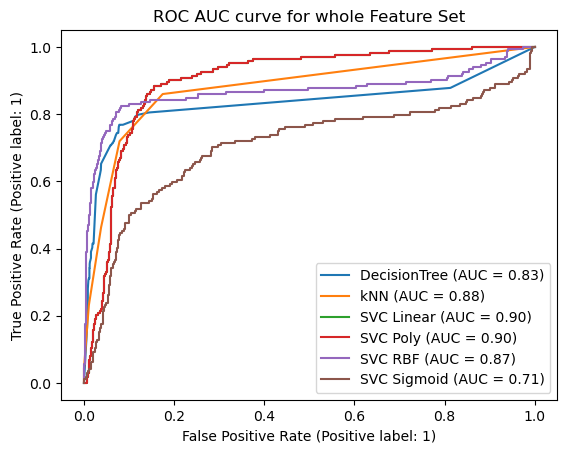

In [401]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Create Classifiers:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split=10, random_state=1) # Best Params
knn_model = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights= 'uniform') #Most efficient params
linear_model = SVC(C=100, kernel='linear', random_state=1) # Most efficient Params
poly_model = SVC(C=100, kernel='linear', random_state=1) # Most efficient Params
rbf_model = SVC(C=100, gamma='auto', kernel='rbf', random_state=1) #Most efficient params
sigmoid_model = SVC(C=0.1, coef0=0.0, kernel="sigmoid", gamma= 'scale', random_state=1) #Most efficient params

# Fit Data:
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train.values.ravel())
linear_model.fit(X_train, y_train.values.ravel())
poly_model.fit(X_train, y_train.values.ravel())
rbf_model.fit(X_train, y_train.values.ravel())
sigmoid_model.fit(X_train, y_train.values.ravel())

#Plot Graph
disp = RocCurveDisplay.from_estimator(dt_model, X_test, y_test, pos_label=1, name='DecisionTree')
disp = RocCurveDisplay.from_estimator(knn_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='kNN')
disp = RocCurveDisplay.from_estimator(linear_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC Linear')
disp = RocCurveDisplay.from_estimator(poly_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC Poly')
disp = RocCurveDisplay.from_estimator(rbf_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC RBF')
disp = RocCurveDisplay.from_estimator(sigmoid_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC Sigmoid')
disp.ax_.set_title("ROC AUC curve for whole Feature Set")

#### Top 3 Features from filter `Information Gain`

Text(0.5, 1.0, 'ROC AUC curve for whole Feature Set')

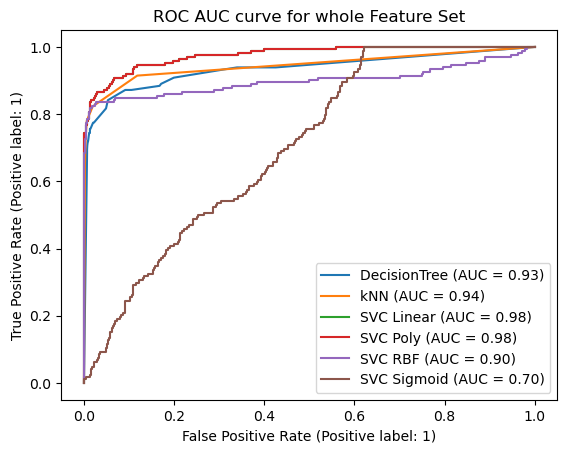

In [402]:
# Create Classifiers:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split=10, random_state=1) # Best Params
knn_model = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights= 'uniform') #Most efficient params
linear_model = SVC(C=100, kernel='linear', random_state=1) # Most efficient Params
poly_model = SVC(C=100, kernel='linear', random_state=1) # Most efficient Params
rbf_model = SVC(C=100, gamma='auto', kernel='rbf', random_state=1) #Most efficient params
sigmoid_model = SVC(C=0.1, coef0=0.0, kernel="sigmoid", gamma= 'scale', random_state=1) #Most efficient params

# Extract the features from the DataFrame
selected_features = df[list(top_3_feature_names)]
target = df['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)

# Fit Data:
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train.values.ravel())
linear_model.fit(X_train, y_train.values.ravel())
poly_model.fit(X_train, y_train.values.ravel())
rbf_model.fit(X_train, y_train.values.ravel())
sigmoid_model.fit(X_train, y_train.values.ravel())

#Plot Graph
disp = RocCurveDisplay.from_estimator(dt_model, X_test, y_test, pos_label=1, name='DecisionTree')
disp = RocCurveDisplay.from_estimator(knn_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='kNN')
disp = RocCurveDisplay.from_estimator(linear_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC Linear')
disp = RocCurveDisplay.from_estimator(poly_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC Poly')
disp = RocCurveDisplay.from_estimator(rbf_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC RBF')
disp = RocCurveDisplay.from_estimator(sigmoid_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC Sigmoid')
disp.ax_.set_title("ROC AUC curve for whole Feature Set")

#### Feature Selection from wrapper `Backwards Sequential Search`

Text(0.5, 1.0, 'ROC AUC curve for whole Feature Set')

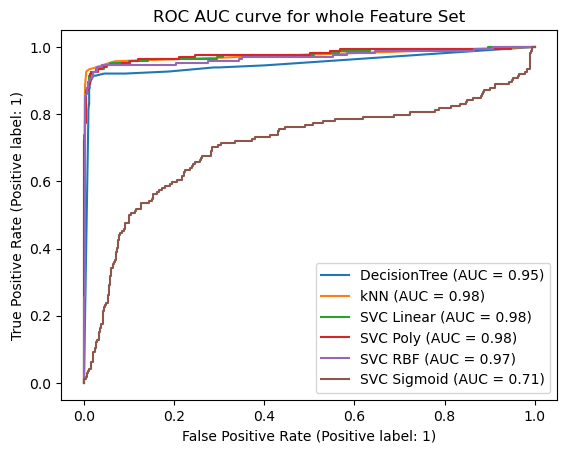

In [403]:
# Create Classifiers:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split=10, random_state=1) # Best Params
knn_model = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights= 'uniform') #Most efficient params
linear_model = SVC(C=100, kernel='linear', random_state=1) # Most efficient Params
poly_model = SVC(C=100, kernel='linear', random_state=1) # Most efficient Params
rbf_model = SVC(C=100, gamma='auto', kernel='rbf', random_state=1) #Most efficient params
sigmoid_model = SVC(C=0.1, coef0=0.0, kernel="sigmoid", gamma= 'scale', random_state=1) #Most efficient params

# Extract the features from the DataFrame, train and fit classifiers:
selected_features = df[list(dt_features_selected)]
target = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)
dt_model.fit(X_train, y_train)
disp = RocCurveDisplay.from_estimator(dt_model, X_test, y_test, pos_label=1, name='DecisionTree') #Plot Graph

selected_features = df[list(knn_features_selected)]
target = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)
knn_model.fit(X_train, y_train.values.ravel())
disp = RocCurveDisplay.from_estimator(knn_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='kNN') #Plot Graph

selected_features = df[list(svm_linear_features_selected)]
target = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)
knn_model.fit(X_train, y_train.values.ravel())
linear_model.fit(X_train, y_train.values.ravel())
disp = RocCurveDisplay.from_estimator(linear_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC Linear') #Plot Graph

selected_features = df[list(svm_poly_features_selected)]
target = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)
poly_model.fit(X_train, y_train.values.ravel())
disp = RocCurveDisplay.from_estimator(poly_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC Poly') #Plot Graph

selected_features = df[list(svm_rbf_features_selected)]
target = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)
rbf_model.fit(X_train, y_train.values.ravel())
disp = RocCurveDisplay.from_estimator(rbf_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC RBF') #Plot Graph

selected_features = df[list(svm_sigmoid_features_selected)]
target = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=1)
sigmoid_model.fit(X_train, y_train.values.ravel())
disp = RocCurveDisplay.from_estimator(sigmoid_model, X_test, y_test, pos_label=1, ax = disp.ax_, name='SVC Sigmoid') #Plot Graph

disp.ax_.set_title("ROC AUC curve for whole Feature Set")

#### As we can see, using the entire feature set from the original dataset yields the lowest ROC AUC values accross the board. 
#### Despite the top 3 features from our filter `Information Gain` perfroming very well here, we can see from our ROC graphs that the `Backwards Sequential Search` wrapper appears to have peformed the best maginally across the board. Specifically, It seems that, similar to the previous task, `KNN`, `SVS Linear` and `SVS Poly` when running `Backwards Sequential Search` is the best suited configurations and classifications respectfully to tackle this task. 
#### The results are consistent when taking our previous conclusions from previous tasks into account, so overall I am quite satisfied with these results